# Multimodal RAG Chatbot

## Install Libraries

In [1]:
!pip install langchain unstructured[all-docs] pydantic lxml pillow tiktoken #we can write other doc(pdf, table, html) instead of all-docs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_

In [1]:
!pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 6.3 MB/s eta 0:00:0


* **langchain unstructured[all-docs]**: Bu, LangChain adlı bir kütüphane için bir bağımlılık kurar. LangChain, LLM'leri uygulamalarınıza entegre etmeyi kolaylaştıran bir çerçevedir.  
    * **unstructured[all-docs]** : Bu kısım, LangChain'in doküman işleme kabiliyetini  genişletir.  "all-docs", çeşitli formatlardaki dokümanları (PDF, Word, HTML, vs.) okumak ve işleyebilmesi için gerekli olan ekstra bağımlılıkları içerir.
* **pydantic**: Bu, Python verilerinin yapılandırılması ve doğrulaması için bir kütüphanedir. LangChain ile entegre olarak, veri girişlerini doğrulamak ve LLM'lere sağlanan verileri yapılandırmak için kullanılır.
* **lxml**: Bu, XML ve HTML belgelerini işlemek için güçlü bir kütüphanedir.  LangChain, unstructured verilerin içindeki XML ve HTML yapılarını işlemek için lxml'i kullanır.
* **pillow**: Bu, görüntü işleme için popüler bir Python kütüphanesidir. LangChain,  görüntü içeren dokümanlar üzerinde çalışırken, görüntü bilgilerini  işlemek için Pillow'ı kullanabilir.
* **chroma**: Bu, benzerlik arama ve vektör verilerinin depolanması için tasarlanmış bir kütüphanedir. LangChain, LLM'lerin çıktıları gibi büyük miktarda veriyi daha etkili bir şekilde indekslemek ve sorgulamak için chromadb kullanabilir.
* **tiktoken**: Bu kütüphane, GPT gibi büyük dil modelleri tarafından kullanılan  tokenleştirme algoritmalarını  uygular. LangChain, LLM'lere gönderilen metni  tokenlere ayırmak için tiktoken'ı kullanır.

**Kısacası:**

Bu kod, Python'da NLP ve LLM uygulamaları geliştirmek için gerekli olan güçlü ve çeşitli kütüphaneleri kurar.  Bu kütüphaneler, doküman işleme, veri yapılandırma, benzerlik arama ve LLM entegrasyonu gibi çeşitli görevleri kolaylaştırır.


langchain unstructured[all-docs]: This sets up a dependency for a library called LangChain. LangChain is a framework that makes it easy to integrate LLMs into your applications.
unstructured[all-docs] : This section extends LangChain's document handling capability. "all-docs" includes the extra dependencies needed to read and process documents in various formats (PDF, Word, HTML, etc.).
pydantic: This is a library for structuring and validation of Python data. Integrated with LangChain, it is used to validate data inputs and structure the data provided to LLMs.
lxml: This is a powerful library for processing XML and HTML documents. LangChain uses lxml to process XML and HTML structures inside unstructured data.
pillow: This is a popular Python library for image processing. LangChain can use Pillow to process image information when working on documents containing images.
chroma: This is a library designed for similarity search and storage of vector data. LangChain can use chromadb to more effectively index and query large amounts of data, such as the output of LLMs.
tiktoken: This library implements tokenization algorithms used by large language models such as GPT. LangChain uses tiktoken to separate text sent to LLMs into tokens.
In a nutshell:

This code installs powerful and diverse libraries that are essential for developing NLP and LLM applications in Python. These libraries facilitate various tasks such as document processing, data structuring, similarity search and LLM integration.

In [2]:
!pip install -qU langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.2 MB/s eta 0:00:00


In [3]:
!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 736.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.9/335.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
#!pip install -qU imageio

In [4]:
from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = userdata.get('openai_key')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import textwrap
#from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Data Loading and Partition PDF tables, text, and images

* Use [Unstructured](https://unstructured-io.github.io/unstructured/) to partition elements

* We install the [necessary libraries](https://unstructured-io.github.io/unstructured/introduction/getting_started.html) (poppler-utils, tesseract-ocr, libmagic-dev) to detect file types and process pdf and images.


In [7]:
!apt-get install poppler-utils tesseract-ocr -y libmagic-dev #sudo, brew

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libmagic-dev poppler-utils tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,107 kB of archives.
After this operation, 16.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 te

Bu kod, Linux tabanlı bir sistemde **poppler-utils** ve **tesseract-ocr** paketlerini kurmak için kullanılır. Bu paketler, PDF dosyalarını işleme ve OCR (Optik Karakter Tanıma) işlemleri gerçekleştirme yeteneği kazandırır.

İşte kodu parçalara ayırıp açıklayalım:

* **!**  :  Bu, bir terminalde komutun "root" yetkileriyle çalıştırılması gerektiğini belirten bir işarettir.
* **sudo** :   "super user do" anlamına gelir. Bu komut, kullanıcıya root yetkileri sağlar.
* **apt-get** :   Ubuntu ve Debian tabanlı Linux dağıtımlarında paketleri yöneten bir komuttur.
* **install** :   Bu, yeni paketleri yüklemek için kullanılan bir komuttur.
* **poppler-utils** :   Bu paket, PDF dosyalarını işleme yeteneği sağlar. Dosyaları dönüştürmek, görüntülemek, birleştirmek ve bölmek gibi işlemleri gerçekleştirmek için kullanılabilir.
* **tesseract-ocr** :   Bu paket, OCR (Optik Karakter Tanıma) işlemleri için kullanılacak bir araçtır. Bu araç, görüntülerdeki metni tanıyabilir ve metin tabanlı bir dosyaya dönüştürebilir.
* **-y** :   Bu, komut çalıştırılırken uyarı sorularına "evet" yanıtını vermenizi sağlar. Yani, paketleri yüklemek için onay istediğinde otomatik olarak onay verecektir.
* **libmagic-dev** :   Bu paket, dosya türlerini belirlemek için kullanılan "libmagic" kütüphanesinin geliştirme sürümünü içerir. Bu paket, **poppler-utils** gibi bazı paketlerin doğru çalışması için gerekli olabilir.

Bu komutları çalıştırdıktan sonra, sisteminiz PDF dosyalarını işleme ve OCR işlemleri gerçekleştirme yeteneğine sahip olur. Bu, PDF belgelerinden metin çıkarmak, PDF dosyalarını görüntülere dönüştürmek veya PDF dosyaları üzerinde çeşitli işlemler gerçekleştirmek gibi işlemler için kullanılabilir.

This code is used to install the poppler-utils and tesseract-ocr packages on a Linux-based system. These packages provide the ability to process PDF files and perform OCR (Optical Character Recognition) operations.

Let's break down the code and explain it:

! : This is a flag indicating that the command must be run with "root" privileges on a terminal.
sudo : stands for "super user do". This command gives the user root privileges.
apt-get : This is a command that manages packages in Ubuntu and Debian based Linux distributions.
install : This is a command used to install new packages.
poppler-utils : This package provides the ability to handle PDF files. It can be used to perform operations such as converting, viewing, merging and splitting files.
tesseract-ocr : This package is a tool to be used for OCR (Optical Character Recognition) operations. This tool can recognize text in images and convert it into a text-based file.
-y : This allows you to answer "yes" to warning questions when running the command. That is, it will automatically confirm when it asks for confirmation to install packages.
libmagic-dev : This package contains the development version of the "libmagic" library for determining file types. This package may be required for some packages to work correctly, such as poppler-utils.


After running these commands, your system is capable of processing PDF files and performing OCR operations. This can be used for operations such as extracting text from PDF documents, converting PDF files into images or performing various operations on PDF files.

In [8]:
path= "/content/drive/MyDrive/GENAI-LLM/Langchain/" #/content/drive/MyDrive/

[partition function](https://github.com/Unstructured-IO/unstructured/blob/main/unstructured/partition/auto.py)

In [9]:
from unstructured.partition.auto import partition
#from unstructured.partition.pdf import partition_pdf
#from unstructured.partition.text import partition_text

# Get elements
raw_pdf_elements = partition(
                              filename="/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf",
                              extract_images_in_pdf=True,
                              #pdf_infer_table_structure=True,
                              chunking_strategy="by_title",
                              max_characters=4000,    # Considering chunking_strategy, all chunks can contain a maximum of 4000 characters.
                              new_after_n_chars=3800, # Considering chunking_strategy, all chunks can typically contain up to 3800 characters.
                              combine_text_under_n_chars=2000,
                              image_output_dir_path=path, #file path where images will be saved
                              skip_infer_table_types=["pdf", "jpg", "png", "heic"],
                              #url=""
)

#raw_pdf_elements = partition_pdf(
#                                  filename="/content/attention is all you need.pdf",
#                                  extract_images_in_pdf=True,
#                                  infer_table_structure=True,
#                                  chunking_strategy="by_title",
#                                  max_characters=4000,
#                                  new_after_n_chars=3800,
#                                  combine_text_under_n_chars=2000,
#                                  image_output_dir_path=path)


# max_characters=4000, new_after_n_chars=3800 and combine_text_under_n_chars=2000 parameters determine which criteria will be taken into account
# when dividing our data into chunks according to chunking_strategy.
# It means that the newly obtained chunks may contain 2000-3800 characters, but according to chunking_strategy, this number may increase to
# a maximum of 4000 or may decrease below 2000. But it definitely cannot exceed 4000.

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

Bu kod, "attention is all you need.pdf" adlı PDF dosyasını bölümlere ayırarak ve metin ve resim gibi öğelerini çıkararak işleyen bir Python kodu örneğidir. Kod, `unstructured` kütüphanesinin `partition_pdf` fonksiyonunu kullanmaktadır.

İşte kodun adım adım açıklaması:

1. **Gerekli Kütüphaneler:**
   - `from unstructured.partition.auto import partition`:  Bu satır, "LangChain" kütüphanesinin "unstructured" alt modülünden, "partition" fonksiyonunu içe aktarır. Bu fonksiyon, çeşitli doküman tiplerini (PDF, Word, HTML, vs.) bölümlere ayırmak için kullanılır.
   

2. **PDF Dosyasını Bölümlere Ayırma:**
   - `raw_pdf_elements = partition(...)`:  Bu satır,  "partition" fonksiyonunu kullanarak "/content/attention is all you need.pdf"  adlı PDF dosyasını bölümlere ayırır.
   - `filename="/content/attention is all you need.pdf"`:  PDF dosyasının yolunu belirtir.
   - `extract_images_in_pdf=True`: PDF dosyasındaki resimleri çıkarma işlemini etkinleştirir.
   - `pdf_infer_table_structure=True`: PDF dosyasındaki tablo yapılarını algılama işlemini etkinleştirir.
   - `chunking_strategy="by_title"`:  PDF dosyasını başlıklar ("title") temelinde bölümlere ayırma stratejisini belirtir.
   - `max_characters=4000`:  Her bir bölümdeki maksimum karakter sayısını 4000 olarak belirler.
   - `new_after_n_chars=3800`:  Genellikle 3800 karakterden fazla olan bölümleri yeni bölümlere ayırır.
   - `combine_text_under_n_chars=2000`:  2000 karakterden az olan bölümleri birleştirir.
   - `image_output_dir_path=path`:  Çıkarılan resimlerin kaydedileceği dizinin yolunu belirtir.

3. **Parametre Açıklamaları:**
   - `max_characters`, `new_after_n_chars` ve `combine_text_under_n_chars` parametreleri, PDF dosyasını bölümlere ayırırken hangi kriterlerin dikkate alınacağını belirler. Bu parametreler, bölümlerin uzunluğunu ve içeriğini kontrol eder.

4. **Sonuç:**
   - `raw_pdf_elements` değişkeni, PDF dosyasının bölümlere ayrılmış ve analiz edilmiş içeriğini içerir.  Bu değişken, metin, resim, tablo gibi öğeleri içeren bir liste olacaktır.

**Kısacası, bu kod, "attention is all you need.pdf" adlı PDF dosyasını başlıklar temelinde bölümlere ayırır, resimleri çıkarır, tablo yapılarını algılar ve her bir bölümü en fazla 4000 karakter olacak şekilde ayırır.  Bu kod, PDF dosyasının içeriğini daha kolay işlenebilir bir forma dönüştürmek için kullanılır.**

This is an example of Python code that processes a PDF file named "attention is all you need.pdf" by partitioning it and extracting elements such as text and images. The code uses the `partition_pdf` function of the `unstructured` library.

Here is a step-by-step explanation of the code:

1. **Required Libraries:**
   - `from unstructured.partition.auto import partition`:  This line imports the "partition" function from the "unstructured" submodule of the "LangChain" library. This function is used to partition various types of documents (PDF, Word, HTML, etc.).
   

2. **Partitioning a PDF File:**
   - `raw_pdf_elements = partition(...)`:  This line partitions the PDF file "/content/attention is all you need.pdf" using the "partition" function.
   - `filename="/content/attention is all you need.pdf"`:  Specifies the path to the PDF file.
   - `extract_images_in_pdf=True`: Enables the extraction of images in the PDF file.
   - `pdf_infer_table_structure=True`: Enables detection of table structures in a PDF file.
   - `chunking_strategy="by_title"`:  Specifies the strategy for chunking the PDF file based on titles ("title").
   - `max_characters=4000`:  Sets the maximum number of characters in each section to 4000.
   - `new_after_n_chars=3800`:  Generally splits sections with more than 3800 characters into new sections.
      - `combine_text_under_n_chars=2000`:  Combines sections of less than 2000 characters.
   - `image_output_dir_path=path`:  Specifies the path to the directory where the extracted images will be saved.

3. **Parameter Descriptions:**
   - The parameters `max_characters`, `new_after_n_chars` and `combine_text_under_n_chars` determine which criteria are taken into account when dividing the PDF file into sections. These parameters control the length and content of the sections.

4. **Result:**
   - The `raw_pdf_elements` variable contains the segmented and analyzed content of the PDF file.  This variable will be a list of elements such as text, images, tables, etc.

**In short, this script will segment the PDF file "attention is all you need.pdf" into sections based on headings, extract images, detect table structures, and separate each section with a maximum of 4000 characters.  This code is used to convert the content of the PDF file into a more easily processable form.**

In [10]:
raw_pdf_elements

# compositeElement=text chunk
# Table=table chunk

## Separating Table and Text Elements

In [11]:
# This line imports the base64 module, which provides functions for encoding and decoding data using the Base64
# algorithm. Base64 encoding is often used to represent binary data (like images) in a text-based format.

text_elements = []
table_elements = []


for element in raw_pdf_elements:                 # Each observation in the raw_pdf_elements variable is parsed into text and table observations.
    if 'CompositeElement' in str(type(element)): # Text observations are detected and appended to the text_elements list
        text_elements.append(element)
    elif 'Table' in str(type(element)):          # Table observations are detected and appended to the table_elements list
        table_elements.append(element)

Bu kod, `raw_pdf_elements` listesini tarayarak PDF dosyasındaki metin ve tablo öğelerini ayrı listelerde toplar.

İşte kodu adım adım açıklayalım:

1. **Boş Listeler:**
   - `text_elements = []`:  Metin öğelerini saklamak için boş bir liste oluşturulur.
   - `table_elements = []`: Tablo öğelerini saklamak için boş bir liste oluşturulur.

2. **Öğeleri Sıralama:**
   - `for element in raw_pdf_elements:`:  Bu döngü, `raw_pdf_elements` listesinin her bir öğesini inceler.
   - `if 'CompositeElement' in str(type(element))`: Eğer öğenin türü `CompositeElement` ise, bu öğe metin öğesi olarak kabul edilir ve `text_elements` listesine eklenir.
   - `elif 'Table' in str(type(element))`: Eğer öğenin türü `Table` ise, bu öğe tablo öğesi olarak kabul edilir ve `table_elements` listesine eklenir.

**Kısacası, bu kod, `raw_pdf_elements` listesini metin ve tablo öğelerine göre ayırır. Sonuç olarak, `text_elements` listesinde PDF dosyasındaki tüm metin öğeleri ve `table_elements` listesinde tüm tablo öğeleri bulunur.**

Bu kod, daha sonra metin öğelerini ve tablo öğelerini ayrı ayrı işlemek için kullanılabilir. Örneğin, metin öğeleri indekslenebilir, işlenebilir veya doğal dil işleme görevlerinde kullanılabilir; tablo öğeleri ise tablo verilerini analiz etmek veya başka bir formata dönüştürmek için kullanılabilir.

This script scans the `raw_pdf_elements` list and collects text and table elements from the PDF file into separate lists.

Let's explain the code step by step:

1. **Blank Lists:**
   - `text_elements = []`:  An empty list is created to store text items.
   - `table_elements = []`: Create an empty list to store table items.

2. **Sorting Items:**
   - `for element in raw_pdf_elements:`:  This loop examines each element of the `raw_pdf_elements` list.
   - `if 'CompositeElement' in str(type(element))`: If the type of the element is `CompositeElement`, it is considered a text element and added to the `text_elements` list.
   - `elif 'Table' in str(type(element))`: If the type of the element is `Table`, this element is treated as a table element and added to the `table_elements` list.

**In short, this code separates the `raw_pdf_elements` list into text and table elements. As a result, the `text_elements` list contains all text items from the PDF file and the `table_elements` list contains all table items.

This code can then be used to process text items and table items separately. For example, text elements can be indexed, processed, or used in natural language processing tasks, while table elements can be used to analyze tabular data or convert it to another format.

In [12]:
text_elements

In [13]:
table_elements

## Getting The Text Content of Table and Text Elements

In [14]:
text_elements[0].text

'3 2 0 2\n\ng u A 2 ] L C . s c [\n\n7 v 2 6 7 3 0 . 6 0 7 1 : v i X r a\n\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\n\nAttention Is All You Need\n\nAshish Vaswani∗ Google Brain avaswani@google.com\n\nNoam Shazeer∗ Google Brain noam@google.com\n\nNiki Parmar∗ Google Research nikip@google.com\n\nJakob Uszkoreit∗ Google Research usz@google.com\n\nLlion Jones∗ Google Research llion@google.com\n\nAidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu\n\nŁukasz Kaiser∗ Google Brain lukaszkaiser@google.com\n\nIllia Polosukhin∗ ‡ illia.polosukhin@gmail.com\n\nAbstract\n\nThe dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the

In [16]:
table_elements[1].text

'Model ByteNet [18] Deep-Att + PosUnk [39] GNMT + RL [38] ConvS2S [9] MoE [32] Deep-Att + PosUnk Ensemble [39] GNMT + RL Ensemble [38] ConvS2S Ensemble [9] Transformer (base model) Transformer (big) BLEU EN-DE EN-FR 23.75 24.6 25.16 26.03 26.30 26.36 27.3 28.4 39.2 39.92 40.46 40.56 40.4 41.16 41.29 38.1 41.8 Training Cost (FLOPs) EN-DE EN-FR 2.3 · 1019 9.6 · 1018 2.0 · 1019 1.8 · 1020 7.7 · 1019 1.0 · 1020 1.4 · 1020 1.5 · 1020 1.2 · 1020 8.0 · 1020 1.1 · 1021 1.2 · 1021 3.3 · 1018 2.3 · 1019'

In [17]:
table_elements = [i.text for i in table_elements] # convert to each composite element to text
text_elements = [i.text for i in text_elements]   # convert to each table to text

# Tables
print(len(table_elements))

# Text
print(len(text_elements))

4
16


In [18]:
for i, j in enumerate(text_elements):
  print(len(text_elements[i]))

2902
3758
2431
2084
2608
1476
1419
3211
1863
2205
631
2257
1796
3822
3233
2149


## Convert Images to A Text-based Representation Using Base64 Encoding

LangChain ve benzeri RAG (Retrieval-Augmented Generation) uygulamalarında MultivectorRetriever kullanırken görüntülerin base64 formatında olması tercih edilir. Çünkü veri iletimi ve depolama açısından bazı önemli avantajları vardır. İşte bu tercihin başlıca nedenleri:

1. **Veri Transferi ve Depolama Kolaylığı**: Base64 formatı, ikili verileri (bir görüntü dosyasını) metin formatında kodlamaya yarar. Bu, verinin JSON, XML gibi metin tabanlı protokollerle güvenli ve sorunsuz bir şekilde transfer edilmesini ve depolanmasını sağlar.

2. **Platform ve Dil Bağımsızlığı**: Base64 formatı, çeşitli programlama dilleri ve platformlar arasında uyumluluk sağlar. Bu sayede, bir görüntünün farklı sistemler arasında taşınması ve işlenmesi daha kolay hale gelir.

3. **API Kullanımı**: Çoğu web servisi ve API, veri transferinde base64 formatını destekler. Özellikle, API'ler aracılığıyla görüntü verisi göndermek ve almak gerektiğinde, base64 kodlama yaygın olarak kullanılır.

4. **Güvenlik ve Bütünlük**: Base64 kodlama, görüntü verisinin güvenli bir şekilde iletilmesini ve depolanmasını sağlar. İkili verilerin doğrudan iletilmesi sırasında oluşabilecek veri bozulmalarının önüne geçer.

5. **Görüntülerin Metinle Birleştirilmesi**: RAG modellerinde, metin ve görüntü verilerinin birlikte işlenmesi gereken durumlar olabilir. Base64, görüntü verisinin metin formatına dönüştürülerek metinle birlikte işlenmesini ve saklanmasını mümkün kılar.

Bu nedenlerle, LangChain gibi modern RAG uygulamalarında MultivectorRetriever kullanırken, görüntülerin base64 formatında olması yaygın ve pratik bir yaklaşımdır. Bu sayede veri iletimi, uyumluluk ve güvenlik konularında önemli avantajlar elde edilir.

When using MultivectorRetriever in LangChain and similar RAG (Retrieval-Augmented Generation) applications, it is preferred that the images are in base64 format. This is because it has some important advantages in terms of data transmission and storage. Here are the main reasons for this preference:

1. **Ease of Data Transfer and Storage**: Base64 format is used to encode binary data (an image file) in text format. This allows data to be transferred and stored securely and seamlessly with text-based protocols such as JSON, XML, etc.

2. **Platform and Language Independence**: The Base64 format provides compatibility between various programming languages and platforms. This makes it easier to move and process an image between different systems.

3. **API Utilization**: Most web services and APIs support the base64 format for data transfer. In particular, base64 encoding is widely used when it is necessary to send and receive image data through APIs.

4. **Security and Integrity**: Base64 encoding ensures secure transmission and storage of image data. It prevents data corruption that can occur during direct transmission of binary data.

5. **Merging Images with Text**: In RAG models, there may be situations where text and image data need to be processed together. Base64 makes it possible to convert image data to text format and process and store it together with text.

For these reasons, when using MultivectorRetriever in modern RAG applications such as LangChain, it is common and practical to base64 the images. This offers significant advantages in terms of data transmission, compatibility and security.


In [19]:
# Function to encode images
import base64

def encode_image(image_path): # This function takes an image_path (the path to an image file) as input.
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8') #The image data is read and encoded using Base64 encoding (base64.b64encode).
        # The encoded data is then converted to a UTF-8 string and returned. We will use this encoded string representation of the image to convert
        # the image into a text-based embedding vector.

Bu kod, verilen bir görseli Base64 kodlamasını kullanarak metin tabanlı bir temsile dönüştüren bir Python fonksiyonudur.

**Adım Adım Açıklama:**

1. **İçe Aktarmalar:**
   - `import base64`: Bu satır, `base64` modülünü içe aktarır. Bu modul, verileri Base64 algoritması kullanarak kodlamak ve çözmek için fonksiyonlar sağlar. Base64 kodlama, genellikle ikili verileri (örneğin görüntüler) metin tabanlı bir formatta temsil etmek için kullanılır.


2. **Fonksiyon Tanımı:**
   - `def encode_image(image_path):`: Bu satır, `encode_image` adlı bir fonksiyon tanımlar. Fonksiyon, `image_path` adlı bir parametre alır, bu da görselin bulunduğu dosya yolunu temsil eder.

3. **Görsel Dosyasını Açma:**
   - `with open(image_path, "rb") as image_file:`:  Bu satır, `image_path`'te belirtilen görsel dosyasını ikili okuma modunda ("rb") açar. `with` deyimi, dosyayı açtıktan sonra dosyayı otomatik olarak kapatmayı sağlar.

4. **Görseli Kodlama:**
   - `return base64.b64encode(image_file.read()).decode('utf-8')`:  Bu satır, görsel dosyasını Base64 kodlaması kullanarak kodlar ve sonucu UTF-8 kodlamalı bir metin dizesine dönüştürerek döndürür.

    - `image_file.read()`:  Görsel dosyasının içeriğini ikili veri olarak okur.
    - `base64.b64encode(...)`:  Okuduğu ikili veriyi Base64 kodlaması kullanarak kodlar.
    - `.decode('utf-8')`:  Kodlanmış ikili veriyi UTF-8 kodlamalı bir metin dizesine dönüştürür.

**Sonuç:**

Fonksiyon, görsel dosyasını açar, içeriğini Base64 kodlaması kullanarak kodlar ve sonucu UTF-8 kodlamalı bir metin dizesine dönüştürür.  Bu metin dizesi, görselin metin tabanlı bir temsilidir ve daha sonra diğer işlevlerde veya sistemlerde kullanılabilir.

This code is a Python function that converts a given image into a text-based representation using Base64 encoding.

**Step by Step Description:**

1. **Imports:**
   - `import base64`: This line imports the `base64` module. This module provides functions for encoding and decoding data using the Base64 algorithm. Base64 encoding is typically used to represent binary data (e.g. images) in a text-based format.


2. **Function Description:**
   - `def encode_image(image_path):`: This line defines a function called `encode_image`. The function takes a parameter called `image_path`, which represents the file path where the image is located.

3. **Open the Image File:**
   - `with open(image_path, "rb") as image_file:`:  This line opens the image file specified in `image_path` in binary read mode ("rb"). The `with` statement allows to close the file automatically after opening it.

4. **Encode Image:**
   - `return base64.b64encode(image_file.read()).decode('utf-8'):  This line encodes the image file using Base64 encoding and returns the result as a UTF-8 encoded text string.

    - `image_file.read()`:  Reads the contents of the image file as binary data.
    - `base64.b64encode(...)`:  Encodes the binary data it reads using Base64 encoding.
    - `.decode('utf-8')`:  Converts the encoded binary data into a UTF-8 encoded text string.

**Result:**
The function opens the image file, encodes its contents using Base64 encoding and converts the result into a UTF-8 encoded text string.  This text string is a text-based representation of the image and can then be used in other functions or systems.

## Separating Image Elements

In [20]:
import os
output_path="/content/figures" ##/content/drive/MyDrive/figures

os.listdir(output_path)

['figure-15-8.jpg',
 'figure-4-3.jpg',
 'figure-4-4.jpg',
 'figure-4-2.jpg',
 'figure-14-6.jpg',
 'figure-3-1.jpg',
 'figure-13-5.jpg',
 'figure-15-7.jpg']

In [21]:
image_elements = []

for image_file in os.listdir(output_path): # The images extracted from the pdf document and saved in the figures file are drawn one by one.
    if image_file.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(output_path, image_file) # The file path is created for files with '.png', '.jpg', '.jpeg' extensions.
        encoded_image = encode_image(image_path) # Images in jpg format are encoded as base64 so that they can be processed by LLMs.
        image_elements.append(encoded_image) # Images encoded as base64 are appended to the image_elements list
print(len(image_elements))

8


In [22]:
os.path.join(output_path, "figure-4-3.jpg")

'/content/figures/figure-4-3.jpg'

Bu kod, belirli bir dizinde bulunan resim dosyalarını Base64 kodlamasını kullanarak kodlar ve kodlanmış resimleri bir listeye ekler.

İşte kodun adım adım açıklaması:

1. **Boş Liste:**
   - `image_elements = []`:  Base64 kodlanmış resimleri saklamak için boş bir liste oluşturulur.

2. **Dosya Listesini Gezinme:**
   - `for image_file in os.listdir(output_path):`:  Bu döngü, `output_path` dizinindeki her bir dosyayı inceler. `os.listdir()` fonksiyonu, belirtilen dizindeki tüm dosya ve klasör isimlerini içeren bir liste döndürür.

3. **Resim Dosyalarını Seçme:**
   - `if image_file.endswith(('.png', '.jpg', '.jpeg')):`:  Eğer dosya adı ".png", ".jpg" veya ".jpeg" ile bitiyorsa, dosya bir resim dosyası olarak kabul edilir.

4. **Resim Yolunu Oluşturma:**
   - `image_path = os.path.join(output_path, image_file)`:  Bu satır, `image_file` adlı dosyanın tam yolunu oluşturur. `os.path.join()` fonksiyonu, verilen dizin yolunu ve dosya adını birleştirerek tam dosya yolunu oluşturur.

5. **Resmi Kodlama:**
   - `encoded_image = encode_image(image_path)`:  Bu satır, `encode_image()` fonksiyonunu kullanarak `image_path`'te belirtilen resmi Base64 kodlamasını kullanarak kodlar.

6. **Kodlanmış Resmi Listeye Ekleme:**
   - `image_elements.append(encoded_image)`:  Kodlanmış resim, `image_elements` listesine eklenir.

7. **Liste Uzunluğunu Yazdırma:**
   - `print(len(image_elements))`:  Bu satır, `image_elements` listesinin uzunluğunu (yani, kodlanmış resim sayısını) yazdırır.

**Kısacası, bu kod, `output_path` dizinindeki tüm PNG, JPG ve JPEG resim dosyalarını Base64 kodlamasını kullanarak kodlar ve kodlanmış resimleri `image_elements` listesine ekler.  Bu liste daha sonra Büyük Dil Modelleri (LLM'ler) veya diğer sistemler tarafından işlenmek üzere kullanılabilir.**

Bu kod, özellikle bir RAG sohbet robotunda, resimleri metin tabanlı bir formata dönüştürerek, LLM'lerin resimlerle ilgili soruları yanıtlamasını sağlamak için kullanılabilir.

This code encodes image files in a given directory using Base64 encoding and adds the encoded images to a list.

Here is a step by step explanation of the code:

1. **Blank List:**
   - `image_elements = []`:  An empty list is created to store Base64 encoded images.

2. **Navigate File List:**
   - `for image_file in os.listdir(output_path):`:  This loop examines each file in the `output_path` directory. The `os.listdir()` function returns a list of all file and folder names in the specified directory.

3. **Selecting Image Files:**
   - `if image_file.endswith(('.png', '.jpg', '.jpeg')):`:  If the file name ends with ".png", ".jpg" or ".jpeg", the file is considered an image file.

4. **Creating the Image Path:**
   - `image_path = os.path.join(output_path, image_file)`:  This line creates the full path to the file named `image_file`. The `os.path.join()` function combines the given directory path and file name to create the full file path.

5. **Formal Encoding:**
   - `encoded_image = encode_image(image_path)`:  This line uses the `encode_image()` function to encode the image specified in `image_path` using Base64 encoding.

6. **Adding the Encoded Image to the List:**
   - `image_elements.append(encoded_image)`:  The encoded image is appended to the `image_elements` list.

7. **Printing the List Length:**
   - `print(len(image_elements))`:  This line prints the length of the `image_elements` list (that is, the number of encoded images).

   **In short, this script encodes all PNG, JPG and JPEG image files in the `output_path` directory using Base64 encoding and adds the encoded images to the `image_elements` list.  This list can then be used for processing by Large Language Models (LLMs) or other systems.**

This code can be used, especially in a RAG chatbot, to convert images into a text-based format to enable LLMs to answer questions about the images.

In [23]:
os.path.join(output_path, "figure-4-3.jpg")

'/content/figures/figure-4-3.jpg'

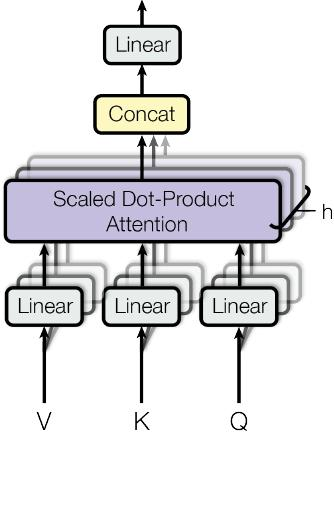

In [24]:
import PIL.Image

image = PIL.Image.open("/content/figures/figure-4-3.jpg")
image

## Summarize Original Text, Tables and Images.

In [25]:
from langchain_openai import ChatOpenAI
from langchain.schema.messages import HumanMessage, AIMessage, SystemMessage

chain_gpt_4o_mini = ChatOpenAI(model="gpt-4o-mini", max_tokens=1024)
#chain_gpt_4o = ChatOpenAI(model="gpt-4o", max_tokens=1024)

# Function for text summaries
def summarize_text(text_element):
    prompt = f"Summarize the following text:\n\ntext:{text_element}\n\nSummary:"
    response = chain_gpt_4o_mini.invoke([HumanMessage(content=prompt)]) #chain_gpt_35.invoke(prompt)
    return response.content

# Function for table summaries
def summarize_table(table_element):
    prompt = f"Summarize the following table:\n\ntable:{table_element}\n\nSummary:"
    response = chain_gpt_4o_mini.invoke([HumanMessage(content=prompt)]) #chain_gpt_35.invoke(prompt)
    return response.content

# Function for image summaries
def summarize_image(encoded_image):
    prompt = [
        SystemMessage(content="You are a bot that is good at analyzing images."),
        HumanMessage(content=[
            {"type": "text", "text": "Describe the contents of this image."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}" # data:[MIME type];base64,[Base64 encoded data]
                },
            },
        ])
    ]
    response = chain_gpt_4o_mini.invoke(prompt)
    return response.content

In [26]:
# Processing table elements with feedback
table_summaries = []
for i, te in enumerate(table_elements):
    summary = summarize_table(te)
    table_summaries.append(summary)
    print(f"{i + 1}th element of tables processed.")

1th element of tables processed.
2th element of tables processed.
3th element of tables processed.
4th element of tables processed.


In [27]:
# Processing text elements with feedback
text_summaries = []
for i, te in enumerate(text_elements):
    summary = summarize_text(te)
    text_summaries.append(summary)
    print(f"{i + 1}th element of texts processed.")

1th element of texts processed.
2th element of texts processed.
3th element of texts processed.
4th element of texts processed.
5th element of texts processed.
6th element of texts processed.
7th element of texts processed.
8th element of texts processed.
9th element of texts processed.
10th element of texts processed.
11th element of texts processed.
12th element of texts processed.
13th element of texts processed.
14th element of texts processed.
15th element of texts processed.
16th element of texts processed.


In [28]:
# Processing image elements with feedback
image_summaries = []
for i, ie in enumerate(image_elements):
    summary = summarize_image(ie)
    image_summaries.append(summary)
    print(f"{i + 1}th element of images processed.")

1th element of images processed.
2th element of images processed.
3th element of images processed.
4th element of images processed.
5th element of images processed.
6th element of images processed.
7th element of images processed.
8th element of images processed.


## Multi-vector retriever

Use [multi-vector-retriever](https://python.langchain.com/docs/modules/data_connection/retrievers/multi_vector#summary).

Summaries are used to retrieve raw/original tables/images and raw/original chunks of text.

### Add to vectorstore

Use [Multi Vector Retriever](https://python.langchain.com/docs/modules/data_connection/retrievers/multi_vector#summary) with summaries.

In [29]:
from langchain_openai import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.schema.document import Document
from langchain.storage import InMemoryStore
from langchain_chroma import Chroma

# Initialize the vector store and storage layer
vectorstore = Chroma(#collection_name="summaries",
                     embedding_function=OpenAIEmbeddings(model="text-embedding-3-large",
                                                         dimensions=3072),
                     persist_directory="/content/drive/MyDrive/GENAI-LLM/Langchain/vectorstore3") # /content/drive/MyDrive/vectorstore
store = InMemoryStore()
id_key = "doc_id"

# Initialize the retriever
retriever = MultiVectorRetriever(vectorstore=vectorstore,
                                 docstore=store,
                                 id_key=id_key)

Bu kod, LangChain kütüphanesini kullanarak bir çoklu vektör geri getirme sistemi (multi-vector retriever) kurar. Bu sistem, metin verilerini vektör uzayında temsil ederek, daha sonra benzer metin parçalarını geri getirmek için kullanır.

İşte kodun adım adım açıklaması:

1. **İçe Aktarmalar:**

   * `from langchain_openai import OpenAIEmbeddings`:  Bu satır, OpenAI'nin vektör yerleştirmeleri oluşturmak için kullanılacak `OpenAIEmbeddings` sınıfını içe aktarır.
   * `from langchain.retrievers.multi_vector import MultiVectorRetriever`:  Bu satır, `MultiVectorRetriever` sınıfını içe aktarır. Bu sınıf, birden fazla vektör deposunu kullanarak bilgi geri getirmek için kullanılır.
   * `from langchain.schema.document import Document`:  Bu satır, LangChain'in `Document` sınıfını içe aktarır. Bu sınıf, bir metin parçası ve ilgili meta verilerle bir dokümanı temsil eder.
   * `from langchain.storage import InMemoryStore`:  Bu satır, `InMemoryStore` sınıfını içe aktarır. Bu sınıf, verileri bellek içinde depolamak için kullanılır.
   * `from langchain_community.vectorstores import Chroma`:  Bu satır, vektör verilerini depolamak için `Chroma` sınıfını içe aktarır. `Chroma`, yüksek performanslı ve ölçeklenebilir bir vektör deposudur.

2. **Vektör Deposu ve Depolama Katmanını Başlatma:**

   * `vectorstore = Chroma(collection_name="summaries", embedding_function=OpenAIEmbeddings(), persist_directory="/content/vectorstore")`: Bu satır, `Chroma` sınıfını kullanarak bir vektör deposu oluşturur.
      * `collection_name="summaries"`:  Vektör deposu için bir isim belirtir.
      * `embedding_function=OpenAIEmbeddings()`:  OpenAI'nin `OpenAIEmbeddings` sınıfını kullanarak vektör yerleştirmelerini oluşturmak için bir fonksiyon belirtir.
      * `persist_directory="/content/vectorstore"`:  Vektör deposunun verilerini kaydedecek dizin yolunu belirtir.
   * `store = InMemoryStore()`:  Bu satır, bir `InMemoryStore` nesnesi oluşturur. Bu, dokümanları bellek içinde depolamak için kullanılır. InMemoryStore, belgelerin orijinal içeriğini depolamak için kullanılacaktır. Model tarafından sorulan soruların embedingleri ile vektör deposunda depolanmış özetlerin embedingleri arasındaki benzerliğe göre en benzer özetler döndürülecektir. Bu özetlere karşılık gelen orijinal veriler InMemoryStore'a yüklenecek ve model bu orijinal verilere göre cevaplarını verecektir.
   * `id_key = "doc_id"`:  Dokümanların benzersiz şekilde tanımlanması için kullanılacak bir anahtar belirtir.

3. **Geri Getirme Sistemini Başlatma:**

   * `retriever = MultiVectorRetriever(vectorstore=vectorstore, docstore=store, id_key=id_key)`:  Bu satır, `MultiVectorRetriever` sınıfını kullanarak bir geri getirme sistemi oluşturur.
      * `vectorstore=vectorstore`:  Daha önce oluşturulan `Chroma` vektör deposunu belirtir.
      * `docstore=store`:  Daha önce oluşturulan `InMemoryStore` nesnesini belirtir.
      * `id_key=id_key`:  Dokümanların benzersiz şekilde tanımlanması için kullanılacak anahtarı belirtir.

**Bu kod, birden fazla vektör deposunu kullanarak bilgi geri getirmek için kullanılabilecek bir `MultiVectorRetriever` nesnesi oluşturur. Bu sistem, metin verilerini vektörlere dönüştürerek, daha sonra benzer metin parçalarını geri getirmek için kullanılır.**

**Kullanım Senaryosu:**

1. **Vektör Yerleştirme Oluşturma:** Bir metin parçasını `OpenAIEmbeddings` kullanarak bir vektör haline dönüştürün.
2. **Vektör Depolama:**  Vektörü `Chroma` vektör deposunda saklayın.
3. **Geri Getirme:**  Bir sorgu (metin) girerek, `MultiVectorRetriever`'i kullanarak vektör deposunda sorgunun benzeri olanları geri getirin.

Bu sistem, bir RAG sohbet robotunda veya bilgi geri getirme sistemlerinde kullanılabilir.

This code builds a multi-vector retrieval system (multi-vector retriever) using the LangChain library. This system represents text data in vector space and then uses it to retrieve similar text fragments.

Here is a step-by-step explanation of the code:

1. **Imports:**

   * `from langchain_openai import OpenAIEmbeddings`:  This line imports OpenAI's `OpenAIEmbeddings` class, which will be used to create vector embeds.
   * `from langchain.retrievers.multi_vector import MultiVectorRetriever`:  This line imports the `MultiVectorRetriever` class. This class is used to retrieve information using multiple vector stores.
   * `from langchain.schema.document import Document`:  This line imports LangChain's `Document` class. This class represents a document with a piece of text and related metadata.
   * `from langchain.storage import InMemoryStore`:  This line imports the `InMemoryStore` class. This class is used to store data in memory.
   * `from langchain_community.vectorstores import Chroma`:  This line imports the `Chroma` class for storing vector data. `Chroma` is a high performance and scalable vector store.
   2. **Initializing the Vector Store and Storage Layer:**

   * `vectorstore = Chroma(collection_name="summaries", embedding_function=OpenAIEmbeddings(), persist_directory="/content/vectorstore")`: This line creates a vector store using the `Chroma` class.
      * `collection_name="summaries"`:  Specifies a name for the vector store.
      * `embedding_function=OpenAIEmbeddings()`:  Specifies a function to create vector embeds using OpenAI's `OpenAIEmbeddings` class.
      * `persist_directory="/content/vectorstore"`:  Specifies the directory path to save the data of the vector store.
   * `store = InMemoryStore()`:  This line creates an `InMemoryStore` object. This is used to store documents in memory. InMemoryStore will be used to store the original content of the documents. Based on the similarity between the embeddings of the questions asked by the model and the embeddings of the abstracts stored in the vector store, the most similar abstracts will be returned. The original data corresponding to these abstracts will be loaded into the InMemoryStore and the model will give its answers based on this original data.
   * `id_key = "doc_id"`:  Specifies a key to be used for unique identification of documents.
3. **Starting the Retrieval System:**

   * `retriever = MultiVectorRetriever(vectorstore=vectorstore, docstore=store, id_key=id_key)`:  This line creates a retrieval system using the `MultiVectorRetriever` class.
      * `vectorstore=vectorstore`:  Specifies the previously created `Chroma` vector store.
      * `docstore=store`:  Specifies the `InMemoryStore` object created earlier.
      * `id_key=id_key`:  Specifies the key to be used for unique identification of documents.

**This script creates a `MultiVectorRetriever` object that can be used to retrieve information using multiple vector stores. This system is used to convert text data into vectors, which are then used to retrieve similar text fragments.

**Usage Scenario:**

1. **Create Vector Embedding:** Convert a text fragment into a vector using `OpenAIEmbeddings`.
2. **Store Vector:** Store the vector in the `Chroma` vector store.
3. **Retrieve:** By entering a query (text), use `MultiVectorRetriever` to retrieve the similar ones of the query in the vector store.

This system can be used in a RAG chatbot or information retrieval systems.



## Uploading Summary Documents to Vectorstore and Original Documents to Docstore

In [30]:
# Function to add documents to the retriever
import uuid #Universally Unique Identifier

def add_documents_to_retriever(summaries, original_contents):
    doc_ids = [str(uuid.uuid4()) for _ in summaries]
    summary_docs = [
        Document(page_content=s, metadata={id_key: doc_ids[i]}) # summaries are converted into document objects and the doc_id corresponding to each summary document is defined.
        for i, s in enumerate(summaries)
    ]

    original_docs = [
        Document(page_content=s, metadata={id_key: doc_ids[i]}) # the original data is converted into a document object and the doc_id corresponding to each original data is defined.
        for i, s in enumerate(original_contents)
    ]

    # The original data corresponding to each summary was indexed with the same doc_id.
    retriever.vectorstore.add_documents(summary_docs)          # The summaries are sent to vectorstore.
    retriever.docstore.mset(list(zip(doc_ids, original_docs))) # The original data corresponding to each summary is sent to docstore as list(zip(doc_ids, original_docs)) format.

- **add_documents_to_retriever** adlı bir fonksiyon tanımlanır. Bu fonksiyon, özetleri vectorstore'a ve bu özetlere karşılık gelen orijinal içerikleri docstore'a ekleyecektir.

- **doc_ids** Vektör deposuna ve docstore'a gönderilen içerikler, birbirleriyle eşleşebilmeleri için benzersiz tanımlayıcılar/indeksler oluşturan uuid algoritması ile indekslenir.

Bu fonksiyon, LangChain'in `MultiVectorRetriever` sistemi için özetleri vector deposuna, orijinal içerikleri  belge deposuna (doc store) eklemek için kullanılır.

İşte fonksiyonun adım adım açıklaması:

1. **İçe Aktarmalar:**

   * `import uuid`:  Bu satır, benzersiz tanımlayıcılar (UUID) oluşturmak için `uuid` modülünü içe aktarır.

2. **Benzersiz Kimlikler Oluşturma:**

   * `doc_ids = [str(uuid.uuid4()) for _ in summaries]`:  Bu satır, `summaries` listesinin uzunluğunda benzersiz kimlikler (UUID) oluşturmak için `uuid` modülünü kullanır. Her bir özet ve orijinal içerik için benzersiz bir kimlik oluşturur.

3. **Özetleri Doküman Nesnelerine Dönüştürme:**

   * `summary_docs = [Document(page_content=s, metadata={id_key: doc_ids[i]}) for i, s in enumerate(summaries)]`: Bu satır, `summaries` listesinin her bir öğesini LangChain'in `Document` nesnesi olarak dönüştürür.  
     * `page_content=s`: Özetin metin içeriğini belirtir.
     * `metadata={id_key: doc_ids[i]}`: Her bir özete karşılık gelen benzersiz kimliği meta veri olarak ekler.

4. **Orijinal İçerikleri Doküman Nesnelerine Dönüştürme:**

   * `original_docs = [Document(page_content=s, metadata={id_key: doc_ids[i]}) for i, s in enumerate(original_contents)]`:  Bu satır, `original_contents` listesinin her bir öğesini LangChain'in `Document` nesnesi olarak dönüştürür.  
     * `page_content=s`: Orijinal içeriğin metin içeriğini belirtir.
     * `metadata={id_key: doc_ids[i]}`: Her bir orijinal içeriğe karşılık gelen benzersiz kimliği meta veri olarak ekler. (Bu kimlik, aynı indeksteki özetin kimliğiyle aynıdır).

5. **Özetleri Vektör Deposuna Ekleme:**

   * `retriever.vectorstore.add_documents(summary_docs)`: Bu satır, `summary_docs` listesini `vectorstore`'a ekler. Vektör deposu, özetlerin vektör temsillerini depolar.

6. **Orijinal İçerikleri Belge Deposuna Ekleme:**

   * `retriever.docstore.mset(list(zip(doc_ids, original_docs)))`: Bu satır, `original_docs` listesini `docstore`'a ekler. `docstore`, orijinal dokümanları depolar. Her bir doküman, `doc_ids` listesindeki benzersiz kimlikle indekslenir.

**Özetle:**

Bu fonksiyon, `summaries` listesini `vectorstore`a ve `original_contents` listesini  `docstore`'a ekler. Özetler, vektör deposunda vektörler olarak saklanırken, orijinal içerikler belge deposunda saklanır. Özetlerle ilgili orijinal içerikler, aynı benzersiz kimlikleri (UUID) kullanarak eşleştirilir, böylece daha sonra orijinal içeriklere kolayca erişilebilir. Bu fonksiyon, bir RAG sohbet robotunda veya bilgi geri getirme sisteminde kullanılabilen bir sistem oluşturmak için önemlidir.


- A function named **add_documents_to_retriever** is defined. This function will add the abstracts to the vectorstore and the corresponding original content to the docstore.

- **doc_ids** The contents sent to the vectorstore and docstore are indexed with the uuid algorithm, which creates unique identifiers/indexes so that they can match each other.

This function is used for LangChain's `MultiVectorRetriever` system to add summaries to the vector store and original content to the doc store.

Here is a step by step description of the function:

1. **Imports:**

   * `import uuid`:  This line imports the `uuid` module to create unique identifiers (UUID).

2. **Creating Unique IDs:**

   * `doc_ids = [str(uuid.uuid4()) for _ in summaries]`:  This line uses the `uuid` module to generate unique IDs (UUID) for the length of the `summaries` list. It creates a unique ID for each summary and the original content.

3. **Converting Summaries to Document Objects:**

   * `summary_docs = [Document(page_content=s, metadata={id_key: doc_ids[i]}) for i, s in enumerate(summaries)]`: This line converts each item of the `summaries` list as a `Document` object of LangChain.  
     * `page_content=s`: Specifies the text content of the summary.
     * `metadata={id_key: doc_ids[i]}`: Adds the unique ID corresponding to each abstract as metadata.


4. **Converting Original Content to Document Objects:**

   * `original_docs = [Document(page_content=s, metadata={id_key: doc_ids[i]}) for i, s in enumerate(original_contents)]`:  This line converts each item of the `original_contents` list as a `Document` object of LangChain.  
     * `page_content=s`: Specifies the text content of the original content.
     * `metadata={id_key: doc_ids[i]}`: Adds the unique ID corresponding to each original content as metadata (this ID is identical to the ID of the abstract in the same index).

5. **Adding Summaries to the Vector Repository:**

   * `retriever.vectorstore.add_documents(summary_docs)`: This line adds the `summary_docs` list to the `vectorstore`. The vectorstore stores vector representations of the summaries.

6. **Adding Original Content to the Document Store:**

   * `retriever.docstore.mset(list(zip(doc_ids, original_docs)))`: This line adds the list `original_docs` to `docstore`. The `docstore` stores the original documents. Each document is indexed by the unique ID in the `doc_ids` list.



**In a nutshell:**

This function adds the `summaries` list to the `vectorstore` and the `original_contents` list to the `docstore`. The summaries are stored as vectors in the vector store, while the original contents are stored in the document store. The original contents related to the summaries are matched using the same unique IDs (UUID) so that the original contents can be easily accessed later. This function is important for building a system that can be used in a RAG chatbot or information retrieval system.

In [31]:
# Add text summaries to vectorstore and the original text corresponding to each summary is sent to docstore
add_documents_to_retriever(text_summaries, text_elements)

# Add table summaries to vectorstore and the original table corresponding to each summary is sent to docstore
add_documents_to_retriever(table_summaries, table_elements)

# Add image summaries to vectorstore and the original image corresponding to each summary is sent to docstore
add_documents_to_retriever(image_summaries, image_elements)

In [32]:
table_summaries[0]

'The table compares different types of neural network layers—Self-Attention, Recurrent, Convolutional, and restricted Self-Attention—based on their complexity per layer and the operations needed for maximum path length. \n\n- **Complexity per Layer**:\n  - **Self-Attention**: \\( O(n^2 \\cdot d) \\)\n  - **Recurrent**: \\( O(n \\cdot d^2) \\)\n  - **Convolutional**: \\( O(k \\cdot n \\cdot d^2) \\)\n  - **Self-Attention (restricted)**: \\( O(r \\cdot n \\cdot d) \\)\n\n- **Sequential Maximum Path Length Operations**:\n  - **Self-Attention**: \\( O(1) \\)\n  - **Recurrent**: \\( O(n) \\)\n  - **Convolutional**: \\( O(1) \\)\n  - **Self-Attention (restricted)**: \\( O(1) \\)\n\nOverall, Self-Attention exhibits the highest complexity per layer, while Recurrent layers have the longest maximum path length operations. Convolutional and restricted Self-Attention layers perform efficiently in terms of both complexity and operations.'

In [33]:
image_elements[0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAIDBAMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyXX/EEngr4sXupQ6Fq2p22o2MSXX2W1LeW6Z2lG6MCOCvGDzm

## Save and Load Docstore and Vectorstore

In [34]:
# get docstore
docstore_store= retriever.docstore
docstore_store

In [35]:
# save the docstore to colab drive/google drive

import pickle

with open('/content/drive/MyDrive/GENAI-LLM/Langchain/docstore.pickle', 'wb') as f: #/content/drive/MyDrive/docstore.pickle'
    pickle.dump(docstore_store, f)

In [36]:
# load the docstore from colab drive/google drive

with open('/content/drive/MyDrive/GENAI-LLM/Langchain/docstore.pickle', 'rb') as f: #/content/drive/MyDrive/docstore.pickle'
    loaded_docstore = pickle.load(f)
loaded_docstore

In [37]:
loaded_vecstore=Chroma(persist_directory="/content/drive/MyDrive/GENAI-LLM/Langchain/vectorstore3", ## /content/drive/MyDrive/vectorstore
                       embedding_function=OpenAIEmbeddings())

In [38]:
retriever_new = MultiVectorRetriever(vectorstore=loaded_vecstore,
                                     docstore=loaded_docstore,
                                     id_key="doc_id")

# Retrieval

Get relevant documents for question:

In [ ]:
#retriever.search_kwargs["k"]=5

# By default, MultiVectorRetriever returns the 4 most relevant/similar contents to the query, but you can change this number as above.

In [39]:
query="What are the sequential operations and maximum path length? explain"

doc_search= retriever.invoke(query) #retriever_new
doc_search

# get four most relevant/similar documents

[Document(metadata={'doc_id': '0770e368-2f4d-4469-99b1-b808d0730694'}, page_content='Layer Type Self-Attention Recurrent Convolutional Self-Attention (restricted) Complexity per Layer O(n2 · d) O(n · d2) O(k · n · d2) O(r · n · d) Sequential Maximum Path Length Operations O(1) O(n) O(1) O(1) O(1) O(n) O(logk(n)) O(n/r)'),
 Document(metadata={'doc_id': '83df1790-6860-43ad-9000-2b8b9596b675'}, page_content='4 Why Self-Attention\n\nIn this section we compare various aspects of self-attention layers to the recurrent and convolu- tional layers commonly used for mapping one variable-length sequence of symbol representations (x1, ..., xn) to another sequence of equal length (z1, ..., zn), with xi, zi ∈ Rd, such as a hidden layer in a typical sequence transduction encoder or decoder. Motivating our use of self-attention we consider three desiderata.\n\nOne is the total computational complexity per layer. Another is the amount of computation that can be parallelized, as measured by the minimum 

In [40]:
doc_search[0].page_content

'Layer Type Self-Attention Recurrent Convolutional Self-Attention (restricted) Complexity per Layer O(n2 · d) O(n · d2) O(k · n · d2) O(r · n · d) Sequential Maximum Path Length Operations O(1) O(n) O(1) O(1) O(1) O(n) O(logk(n)) O(n/r)'

## Separating The Elements Returned by Multivector Retriver Into Text and Images

In [41]:
# We parse the first four contents that are most similar to the question/query we asked above as base64 image and text data.
# because we need to give text and image data to the model separately.
from base64 import b64decode, b64encode
def split_image_text_types(docs):
    ''' Split base64-encoded images and texts '''
    b64 = []  # an empty list to hold base64 encoded images
    text = [] # An empty list to hold tables with plain text
    for doc in docs:
        try:
            b64decode(doc.page_content)   # Try to parse the string expression in Base64 form as binary data
            b64.append(doc.page_content)  # If successful, add to list 'b64' (It will be successful if the document is in base64 format)
        except Exception as e:            # # If it fails/returns error, an exception is thrown (If the document is in text format, an error will occur)
            text.append(doc.page_content) # Treat it as text and add it to the 'text' list
    return {
        "images": b64,                    # Returns output as a dict
        "texts": text
    }
docs_by_type = split_image_text_types(doc_search)

Bu kod parçası, bir dizi dokümanı (metin veya resim) alıp bunları "resim" ve "metin" olarak iki ayrı listeye ayırır. Bu ayrım, dokümanın içeriğinin Base64 kodlaması olup olmadığına göre yapılır. Kod, **Base64 kodu** kullanarak resimleri temsil eden verileri işlemeyi amaçlar.

**Kodun adım adım açıklaması:**

1. **`split_image_text_types(docs)` Fonksiyonu:**
   - Bu fonksiyon, `docs` adlı bir liste alır. Bu liste, her biri bir dokümanı temsil eden nesnelerden oluşur. Her bir dokümanın `page_content` özelliği, dokümanın içeriğini içerir (resim veya metin).
   - Fonksiyon, iki boş liste oluşturur: `b64` ve `text`. Bunlar sırasıyla Base64 kodlu resimleri ve düz metinleri tutacak.

2. **`for doc in docs:` Döngüsü:**
   - Döngü, `docs` listesinin her bir öğesi (`doc`) için çalışır.

3. **`try...except` Bloğu:**
   - `try...except` bloğu, `doc.page_content` içeriğini Base64 kodundan ikili veriye dönüştürmeye çalışır.
   - **`try` Bloğu:**
     - `b64decode(doc.page_content)`: Bu kod, `doc.page_content` içeriğini Base64 kodundan ikili veriye dönüştürmeye çalışır. Eğer başarıyla dönüştürülürse, bu kod bir resim içeriği olduğunu gösterir.
     - `b64.append(doc.page_content)`: Başarılı dönüştürme durumunda, `doc.page_content` `b64` listesine eklenir.
   - **`except Exception as e:` Bloğu:**
     - Eğer `b64decode()` fonksiyonu bir hata döndürürse (yani `doc.page_content` Base64 kodlu değilse), bu blok çalışır. Bu durumda, `doc.page_content` düz metin olarak kabul edilir.
     - `text.append(doc.page_content)`: Hata durumunda, `doc.page_content` `text` listesine eklenir.

4. **Sonuç Dönüşü:**
   - Fonksiyon sonunda, `b64` listesini içeren "images" ve `text` listesini içeren "texts" olmak üzere iki elemandan oluşan bir sözlük (`{ "images": b64, "texts": text }`) döndürür.

**Özetle, bu kod parçası:**

- Bir dizi dokümanı alır.
- Her bir dokümanın içeriğini Base64 kodu olarak kontrol eder.
- Base64 kodlu dokümanları "images" listesinde, düz metin dokümanları "texts" listesinde toplar.
- Sonuç olarak, iki listeyi içeren bir sözlük döndürür.

This piece of code takes a set of documents (text or images) and separates them into two separate lists, "image" and "text". This separation is based on whether the content of the document is Base64 encoded or not. The code aims to process data representing images using **Base64 code**.

**Step-by-step description of the code:**

1. **`split_image_text_types(docs)` Function:**
   - This function takes a list named `docs`. This list consists of objects, each representing a document. The `page_content` property of each document contains the content of the document (image or text).
   - The function creates two empty lists: `b64` and `text`. These will hold Base64 encoded images and plain text respectively.

2. **`for doc in docs:` Loop:**
   - The loop runs for each item (`doc`) of the `docs` list.

3. **`try...except` Block:**
   - The `try...except` block tries to convert the contents of `doc.page_content` from Base64 to binary data.
   - **`try` Block:**
     - `b64decode(doc.page_content)`: This script tries to convert the contents of `doc.page_content` from Base64 to binary data. If successfully converted, this code indicates that there is an image content.
     - `b64.append(doc.page_content)`: On successful conversion, `doc.page_content` is appended to the `b64` list.

        - **`except Exception as e:` Block:**
     - This block is executed if `b64decode()` returns an error (i.e. `doc.page_content` is not Base64 encoded). In this case, `doc.page_content` is treated as plain text.
     - `text.append(doc.page_content)`: On error, `doc.page_content` is appended to the `text` list.

4. **Return Result:**
   - The function returns a dictionary (`{ "images": b64, "texts": text }`) with two elements, "images" containing the list `b64` and "texts" containing the list `text`.

**In a nutshell, this piece of code:**

- Takes an array of documents.
- Checks the content of each document for Base64 code.
- It collects Base64 encoded documents in the "images" list and plain text documents in the "texts" list.
- As a result, it returns a dictionary containing the two lists.

In [42]:
docs_by_type["images"][0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFiALIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiqGtWd1qOi3llZ3QtLi4iMS3G0sYt3BYAEcgEkc9cUAeX+Bfid/wAJD8XNf0k3Ak064GNNO7j9yMHb6hxuf8K9fr5l8G+AYI/jPq2k6dqNzbvoe25tJ3wxdlePKyAYyrBmBxj

## Visualizing Images Returned by Multivector Retriver

image shape: (178, 354)


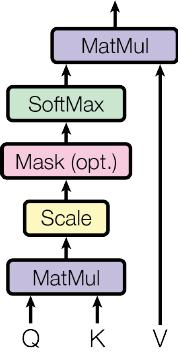

In [43]:
# With this function, we first convert the string expression in base64 form to image and then check its resolution.

from IPython.display import display, HTML
from PIL import Image
import io

def plt_img_base64(img_base64):
    image = Image.open(io.BytesIO(b64decode(img_base64))) # It first analyzes the Base64 string, which is the input parameter,
                                                          # as binary data and then converts this binary data into image data in bytes.

    width, height=image.size
    print(f"image shape: ({width}, {height})") #get image shape

    # Display the image
    return image

plt_img_base64(docs_by_type["images"][0])

Bu kod parçası, verilen bir Base64 kodlu resim string'ini bir görüntüye dönüştürür ve çözünürlüğünü (genişlik ve yükseklik) ekrana yazar.

**Kodun Adım Adım Açıklaması:**

1. **`plt_img_base64(img_base64)` Fonksiyonu:**
   - Bu fonksiyon, `img_base64` adlı bir parametre alır. Bu parametre, bir resmin Base64 kodunu temsil eden bir string'dir.

2. **`image = Image.open(io.BytesIO(b64decode(img_base64)))`:**
   - `b64decode(img_base64)`: Bu kısım, `img_base64`'ü Base64 kodundan ikili veriye (bytes) dönüştürür.
   - `io.BytesIO(b64decode(img_base64))`: Dönüştürülen ikili veri, bir bytes-like nesne oluşturmak için `io.BytesIO()` ile sarılır.
   - `Image.open(...)`: `PIL` kütüphanesinin `Image.open()` fonksiyonu, bytes-like nesneye bağlı bir görüntü dosyası açar ve bir `Image` nesnesi oluşturur.

3. **`width, height = image.size`:**
   - `image.size`: `Image` nesnesinin `size` özelliği, görüntünün genişliğini ve yüksekliğini içeren bir tuple döndürür.
   - `width, height = ...`: Bu satır, tuple'daki değerleri `width` ve `height` değişkenlerine ayırır.

4. **`print(f"image shape: ({width}, {height})")`:**
   - Görüntünün çözünürlüğü (genişlik ve yükseklik) ekrana yazdırılır.

5. **`return image`:**
   - Fonksiyon, dönüştürülen `Image` nesnesini döndürür.

6. **`plt_img_base64(docs_by_type["images"][1])`:**
   - Bu satır, `docs_by_type` sözlüğünün "images" anahtarına bağlı listenin ikinci öğesini (`docs_by_type["images"][1]`) fonksiyona gönderir. Bu, muhtemelen önceki `split_image_text_types` fonksiyonuyla oluşturulmuş Base64 kodlu bir resim string'idir.

**Özetle, bu kod parçası:**

- Verilen bir Base64 kodlu resim string'ini bir görüntüye dönüştürür.
- Görüntünün çözünürlüğünü (genişlik ve yükseklik) ekrana yazar.
- Dönüştürülen `Image` nesnesini döndürür.


## Resizing Images Returned by Multivector Retriver

In [44]:
# We can resize the image to the size we want with the function below. LLMs charge higher for high resolution images.
# However, the better the resolution, the better the analysis of the image.

def resize_base64_image(base64_string, size=(128,128)):
  """
  Resize an image encoded as a Base64 string
  """
  from base64 import b64encode
  # Decode the base64 string
  img_data = b64decode(base64_string)
  img = Image.open(io.BytesIO(img_data))

  # Resize the image
  resized_img = img.resize(size, Image.LANCZOS) # The image is edited to the desired size.
                                                # Image.LANCZOS is the resizing algorithm. Generally provides high quality.

  # Save the resized image to a bytes buffer
  buffered = io.BytesIO() # we create temporary memory.
  resized_img.save(buffered, format=img.format) #We save the resized image into temporary memory.

  # Encode the resized image to Base64
  return b64encode(buffered.getvalue()).decode("utf-8") # We convert the new size image we saved into temporary memory back to base64.

Bu kod parçası, verilen bir Base64 kodlu resim string'inin boyutunu değiştiren bir fonksiyon tanımlar. Bu, büyük çözünürlüklü görüntülerin LLMs tarafından işlenmesinin daha pahalı olması nedeniyle yararlıdır. Daha düşük çözünürlüklü bir resim kullanarak maliyeti düşürebilir, ancak aynı zamanda analiz kalitesini de etkiler.

**Kodun Adım Adım Açıklaması:**

1. **`resize_base64_image(base64_string, size=(128, 128))` Fonksiyonu:**
   - Bu fonksiyon, iki parametre alır:
     - `base64_string`:  Base64 kodlu resim string'ini temsil eder.
     - `size`:  Resmin yeniden boyutlandırılacağı yeni boyutu temsil eden bir tuple. Varsayılan olarak, `(128, 128)` olarak ayarlanır.

2. **`img_data = b64decode(base64_string)`:**
   - `base64_string`'i Base64 kodundan ikili veriye (bytes) dönüştürür.

3. **`img = Image.open(io.BytesIO(img_data))`:**
   - Dönüştürülen ikili veriyi bir bytes-like nesne olarak sarar.
   - `PIL` kütüphanesinin `Image.open()` fonksiyonunu kullanarak bu bytes-like nesneyi bir `Image` nesnesine açar.

4. **`resized_img = img.resize(size, Image.LANCZOS)`:**
   - `img.resize(size, Image.LANCZOS)`:  `Image` nesnesinin `resize()` metodunu kullanarak görüntünün boyutunu `size`'a değiştirir.
     - `Image.LANCZOS`:  Resim yeniden boyutlandırma algoritması olarak `LANCZOS` algoritmasını kullanır. Bu algoritma genellikle yüksek kaliteli sonuçlar verir.

5. **`buffered = io.BytesIO()`:**
   - `io.BytesIO()`'yu kullanarak yeniden boyutlandırılmış görüntüyü geçici olarak depolamak için bir bytes buffer oluşturur.

6. **`resized_img.save(buffered, format=img.format)`:**
   - Yeniden boyutlandırılmış `Image` nesnesini geçici buffer'a kaydeder.
   - `img.format`:  Orijinal görüntünün formatını korur.

7. **`return b64encode(buffered.getvalue()).decode("utf-8")`:**
   - `buffered.getvalue()`:  Geçici buffer'daki ikili verileri alır.
   - `b64encode(...)`:  İkili verileri Base64 koduna dönüştürür.
   - `.decode("utf-8")`:  Base64 kodunu UTF-8 kodlamasında bir string'e dönüştürür.
   - Dönüştürülen Base64 kodlu resim string'ini döndürür.

**Özetle, bu fonksiyon:**

- Verilen Base64 kodlu resim string'ini bir görüntüye dönüştürür.
- Görüntünün boyutunu belirtilen boyuta değiştirir.
- Yeniden boyutlandırılmış görüntüyü Base64 koduna dönüştürür ve döndürür.

In [45]:
# We resize the images in the docs_by_type dict with the resize_base64_image function.
docs_by_type["images"]=[resize_base64_image(i, size=(256,256)) for i in docs_by_type["images"]]

image shape: (256, 256)


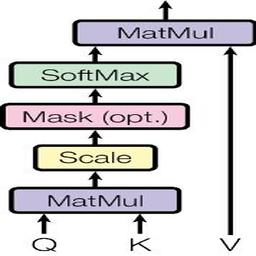

In [46]:
plt_img_base64(docs_by_type["images"][0])

## Retrieval Answer for Questions From Models



In [47]:
# The function below returns an answer by taking all these contents into consideration, depending on whether the contents most similar to
# the question we ask are text/table or image.
def prompt_func(dict, question):
    format_texts = "\n".join(dict["texts"])

    messages = [
        {"type": "text", "text": f"""Answer the question based only on the following context, which can include text, tables and the below image(s) if available:
    Question: {question}

    Text and tables:
    {format_texts}

    """}
    ]

    # Iterate through the images
    for image_data in dict['images']:
        messages.append(
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}}
        )

    return HumanMessage(content=messages)

Bu kod, bir soru ve metin/tablo/resim içeriğinden oluşan bir sözlük alarak, bu içeriğe göre bir cevap oluşturmak için GPT-4o modelini kullanır.

**Kodun Adım Adım Açıklaması:**

1. **`prompt_func(dict, question)` Fonksiyonu:**
   - Bu fonksiyon, iki parametre alır:
     - `dict`:  Soruya en benzer metin/tablo/resim içeriğini içeren bir sözlük. Bu sözlük, "texts" ve "images" anahtarları altında listeler içerir. "texts" anahtarına bağlı liste, metin ve tablo içeriğini tutar, "images" anahtarına bağlı liste ise Base64 kodlu resim string'lerini tutar.
     - `question`:  Kullanıcı tarafından sorulan soru.

2. **`format_texts = "\n".join(dict["texts"])`:**
   - `dict["texts"]`'in elemanlarını (metin ve tablo içeriği) yeni satır karakterleri ile birleştirir, böylece tek bir string haline getirir.

3. **`messages = [...]`:**
   - `messages` adında bir liste oluşturur. Bu liste, GPT-4o modeline iletilecek mesajları içerir.

4. **`{"type": "text", "text": ...}`:**
   - İlk mesajı oluşturur. Bu mesaj, GPT-4o modelinin soruyu cevaplaması için gereken bağlamı içerir.
     - `"type": "text"`:  Mesajın türünün "text" olduğunu belirtir.
     - `"text": ..."`:  Mesajın metin içeriğini belirtir. Bu içerik, soru, metin/tablo içeriği ve varsa resim hakkında bilgi içerir.

5. **`for image_data in dict['images']:`:**
   - `dict['images']`'in elemanlarını (Base64 kodlu resim string'lerini) yineleyen bir döngü.

6. **`{"type": "image_url", "image_url": ...}`:**
   - Her bir resim için bir mesaj oluşturur. Bu mesaj, GPT-4o modeline Base64 kodlu resmin URL'sini sağlar.
     - `"type": "image_url"`:  Mesajın türünün "image_url" olduğunu belirtir.
     - `"image_url": ..."`:  Resmin URL'sini içeren bir sözlük.
       - `"url": ..."`:  Resmin URL'si. `f"data:image/jpeg;base64,{image_data}"` ile Base64 kodlu resim string'ini bir URL'ye dönüştürür.

7. **`return HumanMessage(content=messages)`:**
   - `messages` listesini içeren bir `HumanMessage` nesnesi döndürür. Bu nesne, GPT-4o modeline gönderilecek mesajı temsil eder.

8. **`model = ChatOpenAI(temperature=0, model="gpt-4o", max_tokens=1024)`:**
   - `ChatOpenAI` sınıfından bir `model` nesnesi oluşturur. Bu nesne, GPT-4o modelini temsil eder.
     - `temperature=0`:  Modelin cevaplarını ne kadar yaratıcı hale getireceğini belirtir. 0 değeri, modelin en olası cevabı vermesini sağlar.
     - `model="gpt-4o"`:  GPT-4o modelini kullanır.
     - `max_tokens=1024`:  Modelin üretebileceği maksimum token sayısını belirtir.

**Özetle, bu kod:**

- Bir soru ve ilgili metin/tablo/resim içeriği alır.
- Bu içeriği GPT-4o modeline uygun bir formatta düzenler.
- Modelin soruyu cevaplamasını sağlar.


This code takes a question and a dictionary of text/table/image content and uses the GPT-4o model to generate an answer based on that content.

**Step-by-Step Description of the code:**

1. **`prompt_func(dict, question)` Function:**
   - This function takes two parameters:
     - `dict`:  A dictionary containing the most similar text/table/image content to the question. This dictionary contains lists under the keys "texts" and "images". The list under the "texts" key holds text and table content, while the list under the "images" key holds Base64 encoded image strings.
     - `question`:  The question asked by the user.

2. **`format_texts = "\n".join(dict["texts"])`:**
   - joins the elements of `dict["texts"]` (text and table contents) with newline characters, thus making them a single string.

3. **`messages = [...]`:**
   - Creates a list called `messages`. This list contains messages to be transmitted to the GPT-4o model.

4. **`{"type": "text", "text": ...}`:**
   - Creates the first message. This message contains the context for the GPT-4o model to answer the question.
     - `"type": "text"`:  Indicates that the type of the message is "text".
     - `"text": ..."`:  Specifies the text content of the message. This content includes information about the question, the text/table content and the image, if any.

5. **`for image_data in dict['images']:`:**
   - A loop iterating over the elements (Base64 encoded image strings) of `dict['images']`.


6. **`{"type": "image_url", "image_url": ...}`:**
   - Generates a message for each image. This message provides the URL of the Base64 encoded image to the GPT-4o model.
     - `"type": "image_url"`:  Specifies that the type of the message is "image_url".
     - `"image_url": ..."`:  A dictionary containing the URL of the image.
       - `"url": ..."`:  The URL of the image. `f "data:image/jpeg;base64,{image_data}"` converts the Base64 encoded image string to a URL.

7. **`return HumanMessage(content=messages)`:**
   - Returns a `HumanMessage` object containing a list of `messages`. This object represents the message to be sent to the GPT-4o model.

8. **`model = ChatOpenAI(temperature=0, model="gpt-4o", max_tokens=1024)`:**
   - Creates a `model` object from the `ChatOpenAI` class. This object represents the GPT-4o model.
     - `temperature=0`:  Specifies how creative the model should make its answers. A value of 0 makes the model give the most likely answer.
     - `model="gpt-4o"`:  Uses the GPT-4o model.
     - `max_tokens=1024`:  Specifies the maximum number of tokens the model can generate.

**In a nutshell, this code:**

- Receives a question and related text/table/image content.
- It organizes this content in a format suitable for the GPT-4o model.
- Allows the model to answer the question.

In [48]:
query

'What are the sequential operations and maximum path length? explain'

In [49]:
docs_by_type

{'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACmSypDE8kjBUQFmY8AAdTTjzUNzawXdu8FxEksUgw6OuVYe4oA+a/iB8ZNSu/FtvJ4cuXi0/T5T5Z523TA8sw/iXjivd/BPi+w8Z+H4tRs2

HumanMessage(content=[{'type': 'text', 'text': 'Answer the question based only on the following context, which can include text, tables and the below image(s) if available:\n    Question: What are the sequential operations and maximum path length? explain\n\n    Text and tables:\n    Layer Type Self-Attention Recurrent Convolutional Self-Attention (restricted) Complexity per Layer O(n2 · d) O(n · d2) O(k · n · d2) O(r · n · d) Sequential Maximum Path Length Operations O(1) O(n) O(1) O(1) O(1) O(n) O(logk(n)) O(n/r)\n4 Why Self-Attention\n\nIn this section we compare various aspects of self-attention layers to the recurrent and convolu- tional layers commonly used for mapping one variable-length sequence of symbol representations (x1, ..., xn) to another sequence of equal length (z1, ..., zn), with xi, zi ∈ Rd, such as a hidden layer in a typical sequence transduction encoder or decoder. Motivating our use of self-attention we consider three desiderata.\n\nOne is the total computational
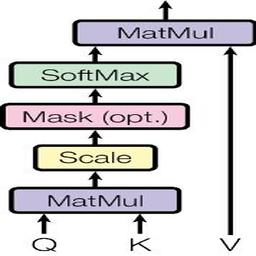
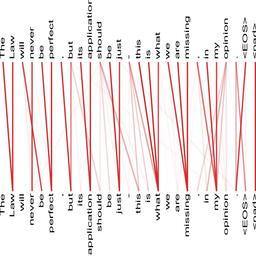

In [50]:
input= prompt_func(docs_by_type, query)
input

In [ ]:
#system message
#chain.llm_chain.prompt.messages[0].prompt.template

In [51]:
model = ChatOpenAI(temperature=0.0,
                   model="gpt-4o-mini",
                   max_tokens=1024,
                   top_p=1.0) # vision models can work on both text and images

output=model.invoke([input])
output

AIMessage(content='The sequential operations and maximum path length for different layer types are summarized as follows:\n\n1. **Self-Attention**:\n   - **Sequential Operations**: O(1)\n   - **Maximum Path Length**: O(1)\n   - Explanation: Self-attention connects all positions with a constant number of operations, allowing for efficient learning of long-range dependencies.\n\n2. **Recurrent**:\n   - **Sequential Operations**: O(n)\n   - **Maximum Path Length**: O(n)\n   - Explanation: Recurrent layers require sequential processing of each input, leading to longer paths for signal traversal, which can hinder learning long-range dependencies.\n\n3. **Convolutional**:\n   - **Sequential Operations**: O(1) (for a single layer)\n   - **Maximum Path Length**: O(logk(n)) (for dilated convolutions) or O(n/k) (for contiguous kernels)\n   - Explanation: Convolutional layers do not connect all input-output pairs directly, requiring multiple layers to achieve full connectivity, which increases pa

In [52]:
to_markdown(output.content)

> The sequential operations and maximum path length for different layer types are summarized as follows:
> 
> 1. **Self-Attention**:
>    - **Sequential Operations**: O(1)
>    - **Maximum Path Length**: O(1)
>    - Explanation: Self-attention connects all positions with a constant number of operations, allowing for efficient learning of long-range dependencies.
> 
> 2. **Recurrent**:
>    - **Sequential Operations**: O(n)
>    - **Maximum Path Length**: O(n)
>    - Explanation: Recurrent layers require sequential processing of each input, leading to longer paths for signal traversal, which can hinder learning long-range dependencies.
> 
> 3. **Convolutional**:
>    - **Sequential Operations**: O(1) (for a single layer)
>    - **Maximum Path Length**: O(logk(n)) (for dilated convolutions) or O(n/k) (for contiguous kernels)
>    - Explanation: Convolutional layers do not connect all input-output pairs directly, requiring multiple layers to achieve full connectivity, which increases path lengths.
> 
> 4. **Self-Attention (restricted)**:
>    - **Sequential Operations**: O(1)
>    - **Maximum Path Length**: O(n/r)
>    - Explanation: When restricted to a neighborhood of size r, the maximum path length increases, but still maintains constant operations.
> 
> In summary, self-attention layers are advantageous for their constant operations and short maximum path lengths, facilitating the learning of long-range dependencies compared to recurrent and convolutional layers.

## Pipeline

In [53]:
# We collect all the operations we have done above under the prep_data function and turn them into a single function.

# This function also returns images if there are any related to the question we asked.

def prep_data(query, size=(256,256)):

  doc_search= retriever.invoke(query)
  docs_by_type = split_image_text_types(doc_search)
  docs_by_type["images"]=[resize_base64_image(i, size=size) for i in docs_by_type["images"]]
  input=prompt_func(docs_by_type, query)
  model=ChatOpenAI(temperature=0.0,
                   model="gpt-4o-mini",
                   max_tokens=1024,
                   top_p=1.0)
  output=model.invoke([input])
  display(to_markdown(output.content))

  for i in docs_by_type["images"]:
    display(plt_img_base64(i))

Bu kod parçası, bir soruyu (query) alıp, ilgili metin, tablo ve resim verilerini toplayarak, GPT-4o modelini kullanarak bir cevap üretir. Ayrıca, kullanılan resim verilerini ekrana görüntüler.

**Kodun Adım Adım Açıklaması:**

1. **`prep_data(query, size=(256, 256))` Fonksiyonu:**
   - Bu fonksiyon, iki parametre alır:
     - `query`:  Kullanıcı tarafından sorulan soru.
     - `size`:  Resimlerin yeniden boyutlandırılacağı boyutu temsil eden bir tuple. Varsayılan olarak, `(256, 256)` olarak ayarlanır.

2. **`doc_search = retriever.invoke(query)`:**
   - `retriever` adında bir fonksiyon kullanarak soruyla ilgili en alakalı dokümanları arar. `doc_search` değişkeni, bu dokümanların bir listesini tutar.

3. **`docs_by_type = split_image_text_types(doc_search)`:**
   - `split_image_text_types` fonksiyonunu kullanarak `doc_search` listesini, "texts" ve "images" anahtarları altında iki listeye ayırır:
     - "texts":  Düz metin ve tablo verilerini içerir.
     - "images":  Base64 kodlu resim string'lerini içerir.

4. **`docs_by_type["images"] = [...]`:**
   - `docs_by_type["images"]`'in elemanlarını (Base64 kodlu resim string'lerini) yineleyen bir döngü.
   - Her bir resim için `resize_base64_image` fonksiyonunu kullanarak resmin boyutunu `size`'a değiştirir.

5. **`prompt = prompt_func(docs_by_type, query)`:**
   - `prompt_func` fonksiyonunu kullanarak, `docs_by_type` sözlüğünü ve soruyu (query) kullanarak GPT-4o modeline gönderilecek bir `HumanMessage` nesnesi oluşturur.

6. **`model = ChatOpenAI(...)`:**
   - `ChatOpenAI` sınıfından bir `model` nesnesi oluşturur. Bu nesne, GPT-4o modelini temsil eder.
     - `temperature=0.0`:  Modelin cevaplarını ne kadar yaratıcı hale getireceğini belirtir. 0.0 değeri, modelin en olası cevabı vermesini sağlar.
     - `model="gpt-4o"`:  GPT-4o modelini kullanır.
     - `max_tokens=1024`:  Modelin üretebileceği maksimum token sayısını belirtir.
     - `model_kwargs={"top_p": 1.0}`:  Modelin davranışını ayarlamak için ek parametreler içeren bir sözlük.

7. **`output = model.invoke([prompt])`:**
   - GPT-4o modelini kullanarak, oluşturulan `prompt` mesajına göre bir cevap üretir. `output` değişkeni, modelin ürettiği çıktıyı tutar.

8. **`display(to_markdown(output.content))`:**
   - `output.content`'i, okunabilir bir Markdown formatına dönüştürür ve ekrana görüntüler.

9. **`for i in docs_by_type["images"]: display(plt_img_base64(i))`:**
   - `docs_by_type["images"]`'in elemanlarını (Base64 kodlu resim string'lerini) yineleyen bir döngü.
   - Her bir resim için `plt_img_base64` fonksiyonunu kullanarak, resmin boyutunu ve çözünürlüğünü ekrana görüntüler.

**Özetle, bu fonksiyon:**

- Bir soruyu (query) alır.
- Soruyla ilgili dokümanları arar.
- Dokümanları metin/tablo ve resim olarak ayırır.
- Resimleri yeniden boyutlandırır.
- Metin/tablo ve resim verilerini kullanarak GPT-4o modelini kullanarak bir cevap üretir.
- Üretilen cevabı ekrana görüntüler.
- Kullanılan resim verilerini ekrana görüntüler.

**Önemli Notlar:**

- `retriever`, `split_image_text_types`, `resize_base64_image`, `prompt_func` ve `plt_img_base64` fonksiyonları kod içinde tanımlanmamıştır. Bu fonksiyonların, bu kod parçasının çalışması için önceden tanımlanmış olması gerektiğini unutmayın.




This piece of code takes a query, collects relevant text, table and image data and generates an answer using the GPT-4o model. It also displays the image data used on the screen.

**Step-by-step description of the code:**

1. **`prep_data(query, size=(256, 256))` Function:**
   - This function takes two parameters:
     - `query`:  The question asked by the user.
     - `size`:  A tuple representing the size to resize the images to. By default, it is set to `(256, 256)`.

2. **`doc_search = retriever.invoke(query)`:**
   - Searches for the most relevant documents related to the query using a function called `retriever`. The variable `doc_search` holds a list of these documents.

3. **`docs_by_type = split_image_text_types(doc_search)`:**
   - Using the `split_image_text_types` function splits the `doc_search` list into two lists under the keys "texts" and "images":
     - `texts`:  Contains plain text and tabular data.
     - "images":  Contains Base64 encoded image strings.

4. **`docs_by_type["images"] = [...]`:**
   - A loop iterating over the elements (Base64 encoded image strings) of `docs_by_type["images"]`.
   - For each image, it changes the size of the image to `size` using the `resize_base64_image` function.

5. **`prompt = prompt_func(docs_by_type, query)`:**
   - Creates a `HumanMessage` object to be sent to the GPT-4o model using the `prompt_func` function, the `docs_by_type` dictionary and the query.
   6. **`model = ChatOpenAI(...)`:**
   - Creates a `model` object from the `ChatOpenAI` class. This object represents the GPT-4o model.
     - `temperature=0.0`:  Specifies how creative the model will make its answers. A value of 0.0 makes the model give the most likely answer.
     - `model="gpt-4o"`:  Uses the GPT-4o model.
     - `max_tokens=1024`:  Specifies the maximum number of tokens the model can generate.
     - `model_kwargs={"top_p": 1.0}`:  A dictionary with additional parameters to tune the behavior of the model.

7. **`output = model.invoke([prompt])`:**
   - Using the GPT-4o model, it generates a response based on the generated `prompt` message. The `output` variable holds the output produced by the model.

8. **`display(to_markdown(output.content))`:**
   - Converts `output.content` into a readable Markdown format and displays it on the screen.

9. **`for i in docs_by_type["images"]: display(plt_img_base64(i))`:**
   - A loop iterating over the elements (Base64 encoded image strings) of `docs_by_type["images"]`.
   - For each image, it uses the `plt_img_base64` function to display the size and resolution of the image.



**In a nutshell, this function:**

- Receives a question (query).
- Searches for documents related to the query.
- Separates documents into text/table and images.
- Resizes the images.
- Generates an answer using the GPT-4o model using the text/table and image data.
- Displays the generated response on the screen.
- Displays the image data used on the screen.

**Important Notes:**

- The functions `retriever`, `split_image_text_types`, `resize_base64_image`, `prompt_func` and `plt_img_base64` are not defined in the code. Note that these functions must be predefined for this code fragment to work.



> The sequential operations and maximum path length for different layer types are summarized as follows:
> 
> 1. **Self-Attention**:
>    - **Sequential Operations**: O(1)
>    - **Maximum Path Length**: O(1)
> 
> 2. **Recurrent**:
>    - **Sequential Operations**: O(n)
>    - **Maximum Path Length**: O(n)
> 
> 3. **Convolutional**:
>    - **Sequential Operations**: O(1)
>    - **Maximum Path Length**: O(logk(n)) for dilated convolutions, or O(n/k) for contiguous kernels.
> 
> 4. **Self-Attention (restricted)**:
>    - **Sequential Operations**: O(1)
>    - **Maximum Path Length**: O(n/r)
> 
> ### Explanation:
> - **Sequential Operations** refer to the number of operations that must be performed in a sequence, affecting how parallelizable the computation is. Self-attention layers allow for constant-time operations, making them highly parallelizable, while recurrent layers require operations proportional to the sequence length, making them less efficient in this regard.
>   
> - **Maximum Path Length** indicates the longest distance signals must travel within the network to connect input and output positions. Shorter paths facilitate learning long-range dependencies. Self-attention maintains a constant path length, while recurrent layers have a linear path length, and convolutional layers can vary based on kernel size and type.

image shape: (256, 256)


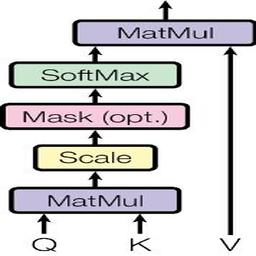

image shape: (256, 256)


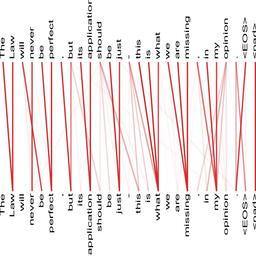

In [54]:
prep_data(query)

## Using Multipleretriver with Langgraph Agent

In [55]:
!pip install -qU langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 1.1 MB/s eta 0:00:00


In [56]:
retriever

MultiVectorRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x7fcdbf9287c0>, docstore=<langchain_core.stores.InMemoryStore object at 0x7fcdbf928e20>)

In [57]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(retriever=retriever,
                                     name="transformers_and_attention_search",
                                     description="Search for information about transformers and attention. For any questions about transformers and attention. \
                                     For any question about article of 'Attention Is All You Need', you must use this tool!.")

In [58]:
user_input= "what is transformers?"

In [59]:
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(temperature=0.0,
                 model="gpt-4o-mini",
                 top_p=1)

# The tools we'll give the Agent access to.
tools = [retriever_tool] # search_tool

prompt="Make sure to use transformers_and_attention_search tool for questions about transformers and attentions and in all other cases, answer \
the other questions in the most accurate way possible. If you don't know the answer, say I don't know"
model_with_tools = llm.bind_tools(tools)

agent_executor = create_react_agent(model_with_tools, tools, state_modifier=prompt)

response = agent_executor.invoke({"messages": [HumanMessage(content=user_input)]})

response["messages"]

[HumanMessage(content='what is transformers?', id='dca50c8e-3949-4a7d-b002-2b451cae6c2e'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7V1cENNRZJ36tQzTdOtthLqg', 'function': {'arguments': '{"query":"what is transformers?"}', 'name': 'transformers_and_attention_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 133, 'total_tokens': 153}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_611b667b19', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-723c6e05-8d76-4cd1-95b5-670ea8ad5e3d-0', tool_calls=[{'name': 'transformers_and_attention_search', 'args': {'query': 'what is transformers?'}, 'id': 'call_7V1cENNRZJ36tQzTdOtthLqg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 20, 'total_tokens': 153}),
 ToolMessage(content='1 Introduction\n\nRecurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, hav

In [60]:
response["messages"][-1].content

'Transformers are a type of neural network architecture that relies entirely on attention mechanisms, eschewing recurrence and convolutions. They were introduced in the paper "Attention Is All You Need" and have become a dominant model for sequence transduction tasks, such as language translation.\n\nThe key features of Transformers include:\n\n1. **Attention Mechanism**: Transformers use self-attention to compute representations of input and output sequences, allowing the model to focus on different parts of the input when producing an output. This mechanism enables the model to capture dependencies between words regardless of their distance in the sequence.\n\n2. **Parallelization**: Unlike recurrent neural networks (RNNs), which process sequences sequentially, Transformers can process all elements of a sequence simultaneously. This leads to significant improvements in training speed and efficiency.\n\n3. **Encoder-Decoder Structure**: The Transformer architecture consists of an enco

In [61]:
user_input= "Who is the 6th president of USA?"

agent_executor = create_react_agent(model_with_tools, tools, state_modifier=prompt)

response = agent_executor.invoke({"messages": [HumanMessage(content=user_input)]})

response["messages"]

[HumanMessage(content='Who is the 6th president of USA?', id='1dacc24d-7997-4537-a728-e99e583cbd77'),
 AIMessage(content='The 6th president of the United States was John Quincy Adams, who served from 1825 to 1829.', response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 139, 'total_tokens': 165}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_611b667b19', 'finish_reason': 'stop', 'logprobs': None}, id='run-6478cf8e-680d-4fc4-8241-8f6a021a7dce-0', usage_metadata={'input_tokens': 139, 'output_tokens': 26, 'total_tokens': 165})]

In [62]:
response["messages"][-1].content

'The 6th president of the United States was John Quincy Adams, who served from 1825 to 1829.'

In [70]:
user_input="Which team won the European 2024 football champions league?"

agent_executor = create_react_agent(model_with_tools, tools, state_modifier=prompt)

response = agent_executor.invoke({"messages": [HumanMessage(content=user_input)]})

response["messages"]

[HumanMessage(content='Which team won the European 2024 football champions league?', id='0cfe7d2e-6c9e-4efc-9772-a32fd9a6f26c'),
 AIMessage(content="I don't know.", response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 141, 'total_tokens': 146}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_611b667b19', 'finish_reason': 'stop', 'logprobs': None}, id='run-2e8b0c61-2726-409f-bab6-74a0b4b2f2dc-0', usage_metadata={'input_tokens': 141, 'output_tokens': 5, 'total_tokens': 146})]

In [71]:
response["messages"][-1].content

"I don't know."